/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


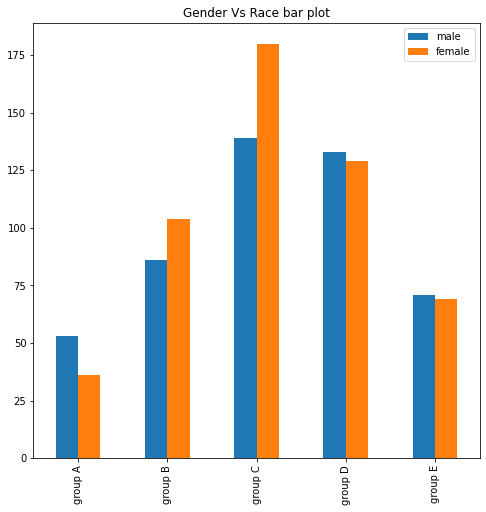

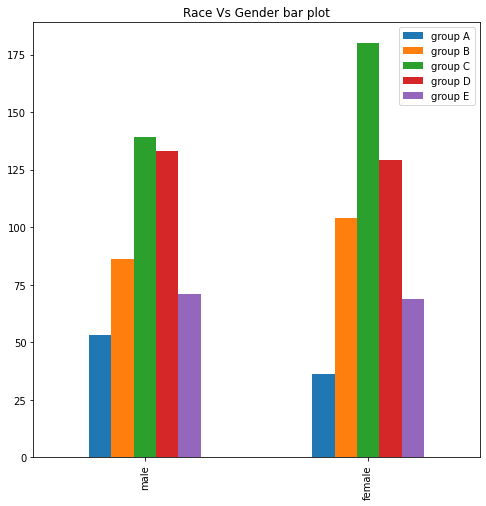

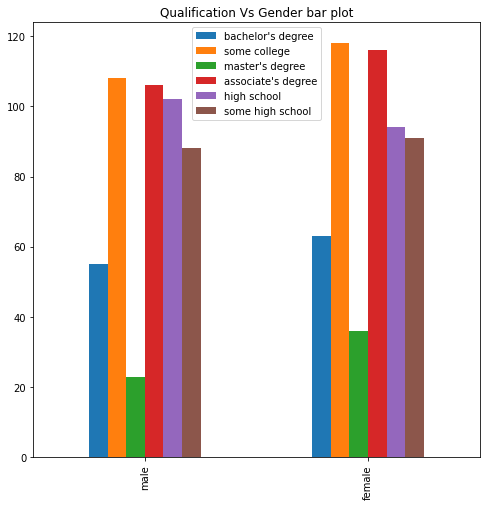

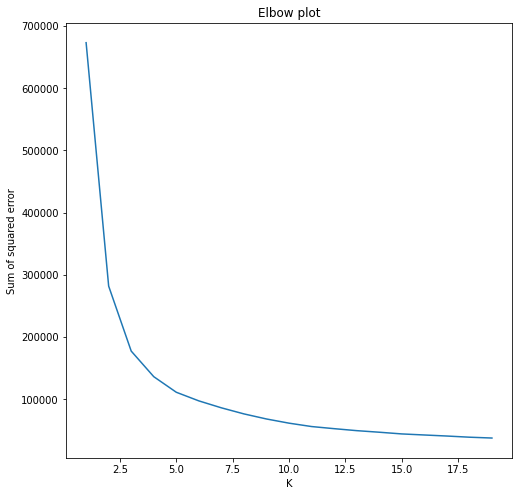

The graph shows k=5 is an optimum value


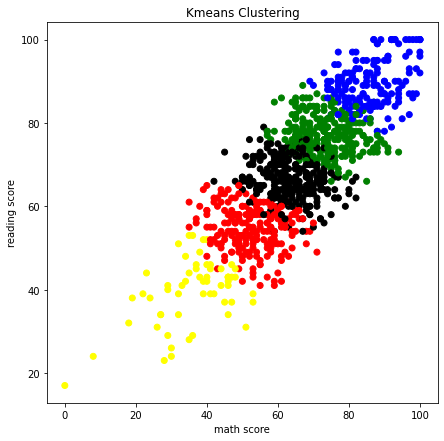

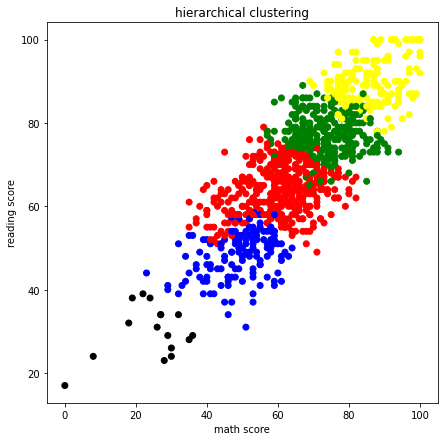

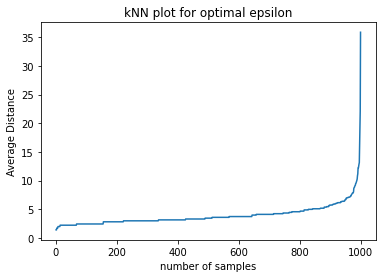

The graph shows epsilon=8 is an optimum value


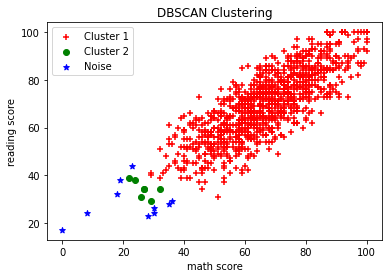

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import axes3d
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

df=pd.read_csv('https://raw.githubusercontent.com/ranjith1604/ML_project/master/project3/StudentsPerformance.csv')
barp=df[['gender','race/ethnicity']]
race=[]
for i in range(barp.shape[0]):
	if barp.iloc[i,1] not in race:
		race.append(barp.iloc[i,1])
race.sort()

a = np.zeros(shape=(len(race),2))
genrace = pd.DataFrame(a,columns=['male','female'],index=race)
for i in range(barp.shape[0]):
	genrace.loc[barp.iloc[i,1],barp.iloc[i,0]]+=1

genrace.plot.bar(figsize=(8,8))
plt.title('Gender Vs Race bar plot')
plt.show()
genrace=genrace.T
genrace.plot.bar(figsize=(8,8))
plt.title('Race Vs Gender bar plot')
plt.show()

barp=df[['gender','parental level of education']]
race=[]
for i in range(barp.shape[0]):
	if barp.iloc[i,1] not in race:
		race.append(barp.iloc[i,1])
#race.sort()

a = np.zeros(shape=(len(race),2))
genrace = pd.DataFrame(a,columns=['male','female'],index=race)
for i in range(barp.shape[0]):
	genrace.loc[barp.iloc[i,1],barp.iloc[i,0]]+=1
genrace=genrace.T
genrace.plot.bar(figsize=(8,8))
plt.title('Qualification Vs Gender bar plot')
plt.show()
mldata=df[['math score','reading score','writing score']]
sse = []
k_rng = range(1,20)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(mldata)
    sse.append(km.inertia_)
plt.figure(figsize=(8,8))
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)
plt.title('Elbow plot')
plt.show()
print('The graph shows k=5 is an optimum value')
km = KMeans(n_clusters=5)
km.fit(mldata)
colormap=np.array(['red','blue','black','green','yellow'])
plt.figure(figsize=(7,7))
plt.scatter(mldata['math score'],mldata['reading score'],c=colormap[km.labels_])
plt.xlabel('math score')
plt.ylabel('reading score')
plt.title("Kmeans Clustering")
plt.show()

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='complete')
y_hc=hc.fit_predict(mldata)
plt.figure(figsize=(7,7))
plt.scatter(mldata['math score'],mldata['reading score'],c=colormap[y_hc])
plt.xlabel('math score')
plt.ylabel('reading score')
plt.title("hierarchical clustering")
plt.show()
ns = 7
nbrs = NearestNeighbors(n_neighbors=ns).fit(mldata)
distances, indices = nbrs.kneighbors(mldata)
distanceDec = sorted(distances[:,ns-1], reverse=False)
#print(distanceDec)
plt.plot(list(range(1,mldata.shape[0]+1)), distanceDec)
plt.title('kNN plot for optimal epsilon')
plt.xlabel('number of samples')
plt.ylabel('Average Distance')
plt.show()
print('The graph shows epsilon=8 is an optimum value')
dbscan = DBSCAN(eps=8, metric='euclidean', min_samples=7)
dbscan.fit(mldata)
#print(dbscan.labels_)
labels=dbscan.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
#print(n_clusters_)
for i in range(0, mldata.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(mldata.iloc[i,0],mldata.iloc[i,1],c='r',marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(mldata.iloc[i,0],mldata.iloc[i,1],c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(mldata.iloc[i,0],mldata.iloc[i,1],c='b',marker='*')
plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2','Noise'])
plt.title('DBSCAN Clustering')
plt.xlabel('math score')
plt.ylabel('reading score')
plt.show()
